## Twitter Sentiment Analysis Project.

Model = Random Forest Classifier
Steps:

Dataset Analysis

Data preprocessing

Data Visualization

Word cloud visualization

Data Cleaning

Model building and Testing


Sentiment analysis also known as opinion mining is the process of computationally determining whether a piece of writing is positive, negative or neutral.

### Pros of Random Forest Classifier

<ol>It is a very accurate algorithm</ol>

<ol>It is robust to outliers and nonlinear data</ol>

<ol>It is highly scalable to any dataset. It can handle large datasets</ol>

<ol>It can handle missing values efficiently</ol>

<ol>It can be used for feature selection</ol>

### Cons of Random Forest Classifier

<ol>It can be computationally expensive when there are lots of trees</ol>

Datasets: https://github.com/luch91/Machine-Learning-Datasets

https://github.com/laxmimerit/preprocess_kgptalkie

Load dataset
Feature extraction
data visualization
data cleaning
model building
model training
model evaluation
model saving
streamlit application deploy

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/luch91/Machine-Learning-Datasets/main/twitter_sentiment.csv", 
            header=None, index_col=0)
df.head(10)

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
2401,Borderlands,Positive,im getting into borderlands and i can murder y...
2402,Borderlands,Positive,So I spent a few hours making something for fu...
2402,Borderlands,Positive,So I spent a couple of hours doing something f...
2402,Borderlands,Positive,So I spent a few hours doing something for fun...


#### Reset index

In [3]:
df = df[[2,3]].reset_index(drop=True)
df

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


#### Assign Column Names to DataFrame

In [4]:
df.columns = ["sentiment", "text"]
df.head(10)

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
5,Positive,im getting into borderlands and i can murder y...
6,Positive,So I spent a few hours making something for fu...
7,Positive,So I spent a couple of hours doing something f...
8,Positive,So I spent a few hours doing something for fun...
9,Positive,So I spent a few hours making something for fu...


#### Basic Aanlysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()

sentiment      0
text         686
dtype: int64

In [7]:
df.sample(10)  # random samples

,sentiment,text
39447,Positive,The Blast Wave is strong with this one. Gain 7...
27890,Positive,It's very funny when the stars of the arc actu...
22950,Irrelevant,@fpsnoted hello fake csgo pro
42620,Irrelevant,xboxbot.com - the best place to get free WARZONDS
48097,Negative,Why the error page of the @ HomeDepot website ...
63733,Negative,They were scared bro. Sweeping the money under...
7104,Irrelevant,Shoutout to the amazing people who cheered me ...
53891,Irrelevant,"author Covid19 has shown anyone anything, it i..."
54514,Irrelevant,the Join me and RhandlerR as we hold hands and...
11320,Positive,ME LOOK AT TO THIS SEXY ON SPARKLY THE BOX ART ~.


In [8]:
df.dropna(inplace=True)

In [9]:
df["text"].apply(len).value_counts()

text
70     611
3      566
2      500
36     485
57     480
      ... 
418      1
434      1
394      1
427      1
374      1
Name: count, Length: 403, dtype: int64

In [10]:
# the sum of rows with data lengh > 5 and <=5

sum(df["text"].apply(len)>5), sum(df["text"].apply(len)<=5)

(72883, 2113)

In [11]:
print(df.shape)
df = df[df["text"].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


## Feature Load

#### Sentiment Value Counts

In [12]:
df["sentiment"].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

In [14]:
import preprocess_kgptalkie as ps
df.columns

Index(['sentiment', 'text'], dtype='object')

In [16]:
df = ps.get_basic_features(df)
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

stop_words = "and", "or", "now"

mention = "@"

digits = "123"

In [17]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


## Visualization

#### Features Visualization

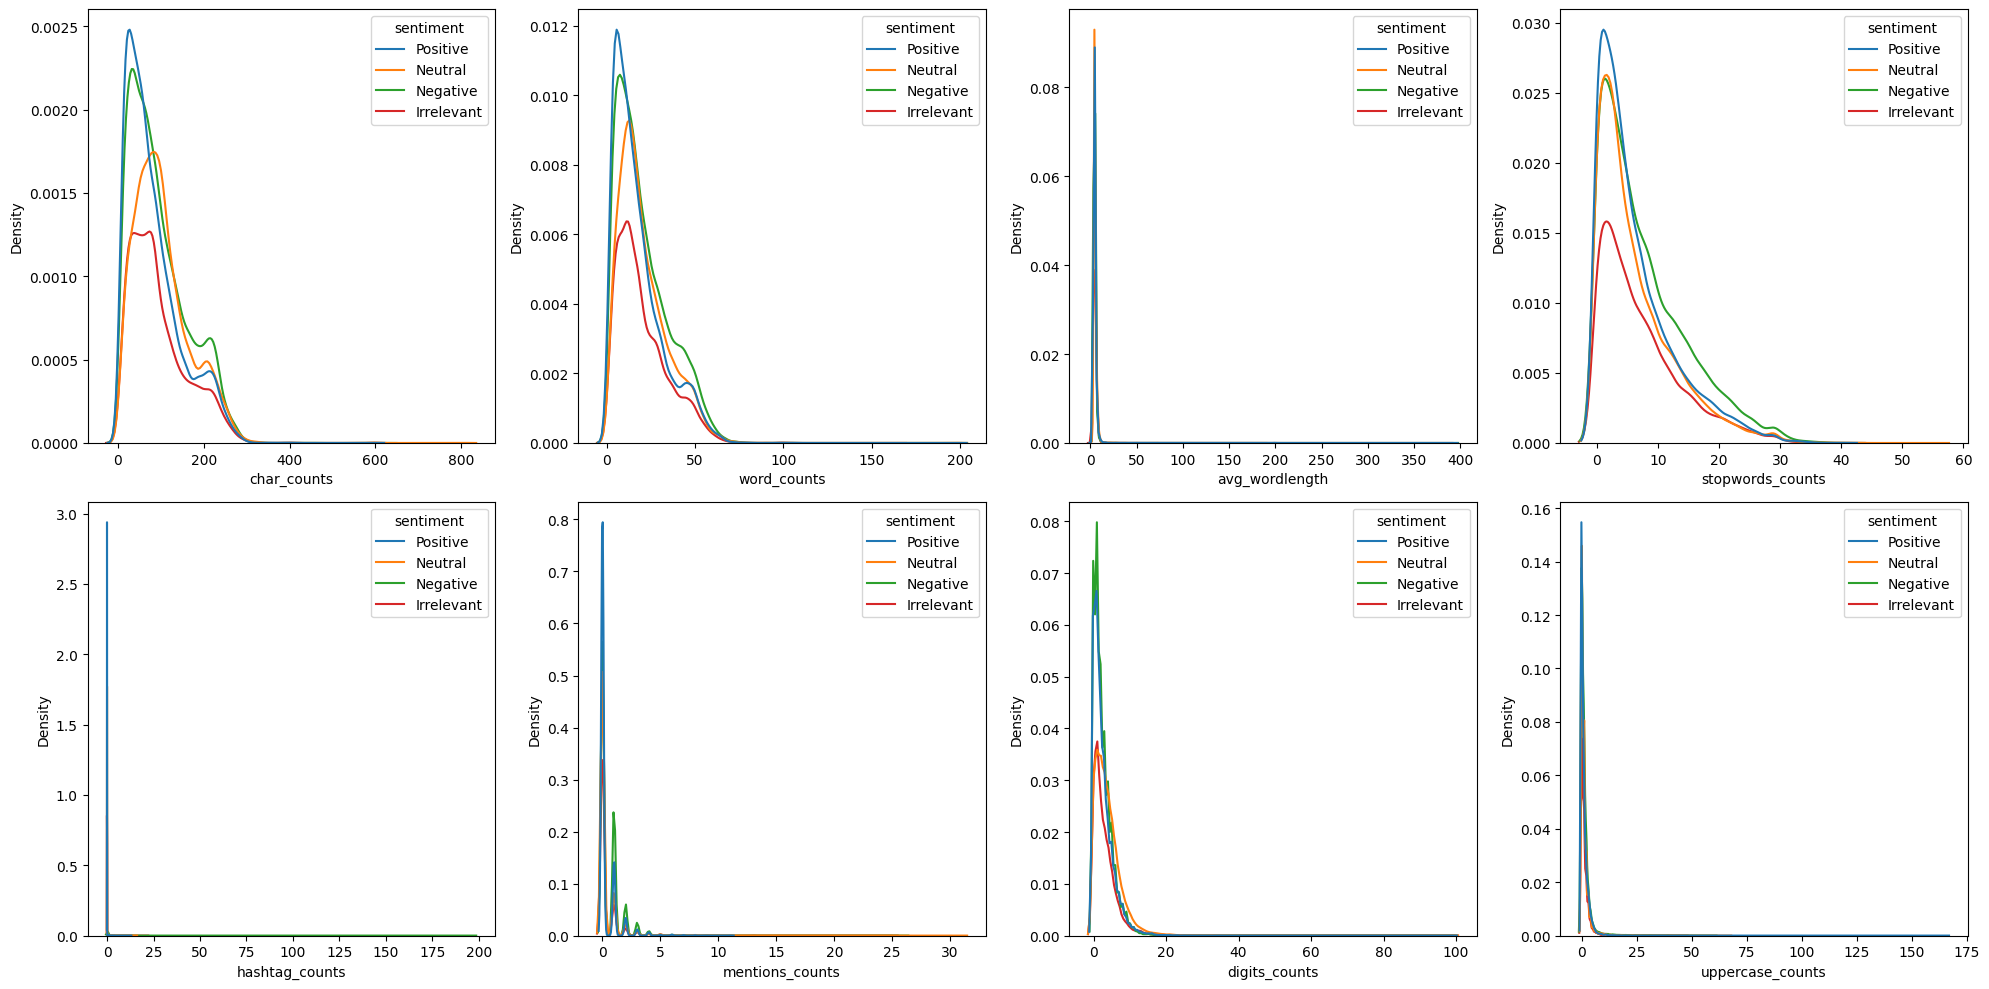

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
num_cols = df.select_dtypes(include="number").columns

for index, col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    sns.kdeplot(data=df, x=col, hue="sentiment",fill=False)

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

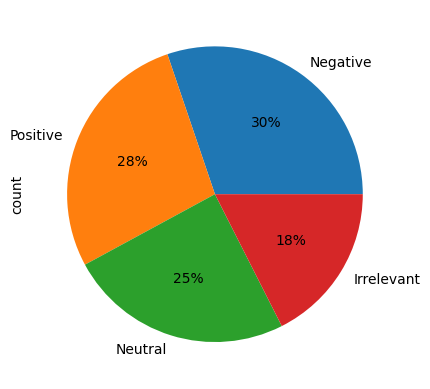

In [19]:
df["sentiment"].value_counts().plot(kind="pie", autopct="%1.0f%%")

#### Word Cloud Visualization

In [22]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

Remove Stopwords

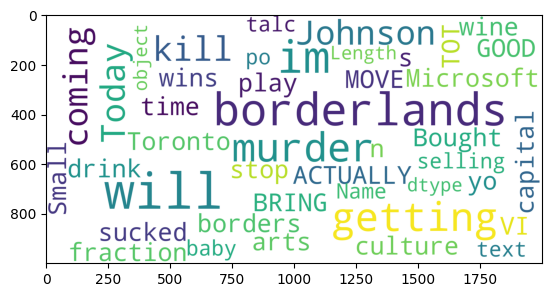

In [23]:
wordcloud = WordCloud(background_color="white", stopwords=stopwords,
                      max_words=300, max_font_size=40,scale=5).generate(str(df["text"]))

plt.imshow(wordcloud)

#### Plot WordCloud for Each Sentiment

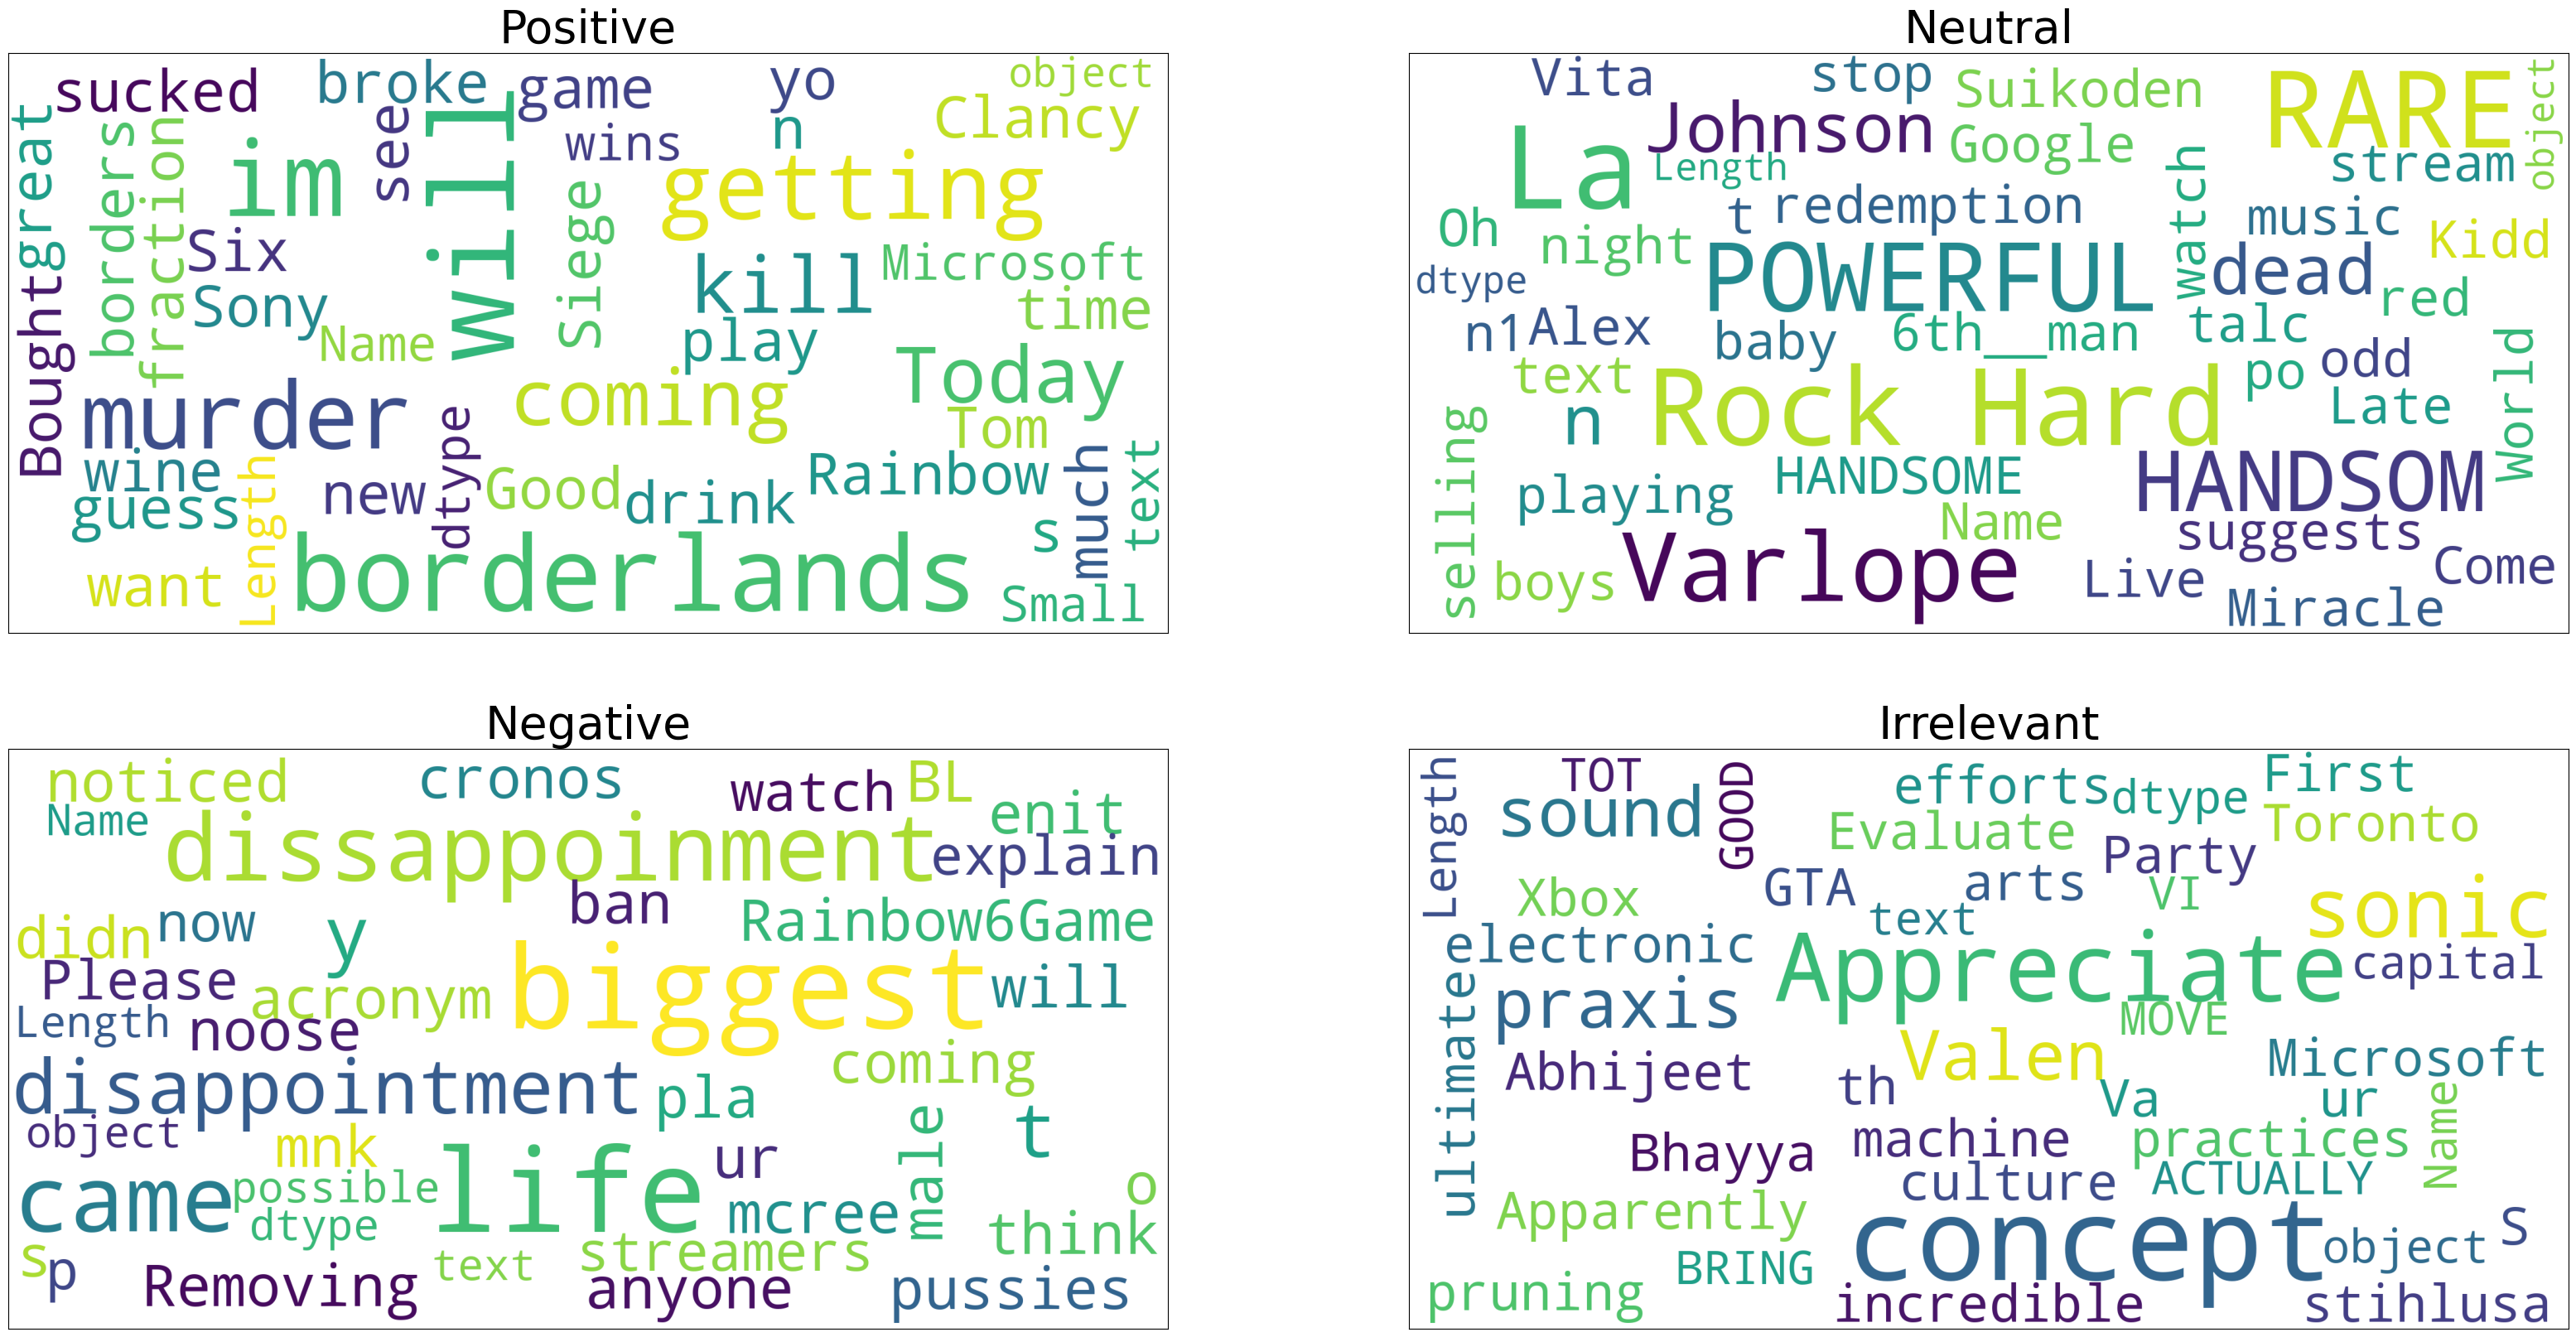

In [25]:
plt.figure(figsize=(40,20))

for index, sent in enumerate(df["sentiment"].unique()):
    plt.subplot(2,2, index+ 1)
    data = df[df["sentiment"]==sent]["text"]
    wordcloud = WordCloud(background_color="white", stopwords=stopwords,
                      max_words=300, max_font_size=40,scale=5).generate(str(data))
    
    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent, fontsize=40)




## Data Cleaning

In [28]:
df["text"] = df["text"].apply(lambda x: x.lower())
df["text"] = df["text"].apply(lambda x: ps.remove_urls(x))
#df["text"] = df["text"].apply(lambda x: ps.remove_html_tags(x))
df["text"] = df["text"].apply(lambda x: ps.remove_rt(x))
df["text"] = df["text"].apply(lambda x: ps.remove_special_chars(x))


## Train-test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["text"], 
                                                    df["sentiment"],
                                                    test_size=0.2,
                                                    random_state=0)

In [30]:
X_train.shape, X_test.shape

((58306,), (14577,))

In [32]:
y_train.shape, y_test.shape

((58306,), (14577,))

## Model Building and Testing

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [42]:
clf = Pipeline([("tfid", TfidfVectorizer()),
                ("rfc", RandomForestClassifier(n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

#### Model Evaluation

In [38]:
from sklearn.metrics import classification_report

In [43]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.85      0.91      2561
    Negative       0.91      0.96      0.93      4481
     Neutral       0.92      0.91      0.91      3553
    Positive       0.90      0.94      0.92      3982

    accuracy                           0.92     14577
   macro avg       0.93      0.91      0.92     14577
weighted avg       0.92      0.92      0.92     14577



## Save Model for Streamlit